In [2]:
#import required packages

import pandas as pd
import numpy as np

In [3]:
yearly_cust_sales = pd.read_csv('Customer_Sales.csv')

In [5]:
yearly_cust_sales.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
yearly_cust_sales.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
X_columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
y_columns = ['Yearly Amount Spent']

### Collections in python
* [] - List
* {} - Dictionary (comes with keys), sets (without keys)
* () - tuples 

In [8]:
yearly_cust_sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


There are no missing values

In [9]:
yearly_cust_sales.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
yearly_cust_sales[X_columns].describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462
std,0.992563,0.994216,1.010489,0.999278
min,29.532429,8.508152,33.913847,0.269901
25%,32.341822,11.388153,36.349257,2.930450
50%,33.082008,11.983231,37.069367,3.533975
75%,33.711985,12.753850,37.716432,4.126502
max,36.139662,15.126994,40.005182,6.922689


In [13]:
yearly_cust_sales.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,erik46@hotmail.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,GreenYellow,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [32]:
discrete_columns = set(yearly_cust_sales.columns) - set(X_columns) - set(y_columns)
discrete_columns

{'Address', 'Avatar', 'Email'}

In [37]:
yearly_cust_sales[discrete_columns].describe()

,Address,Email,Avatar
count,500,500,500
unique,500,500,138
top,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,erik46@hotmail.com,GreenYellow
freq,1,1,7


In [33]:
import seaborn as sns

In [41]:
yearly_cust_sales.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


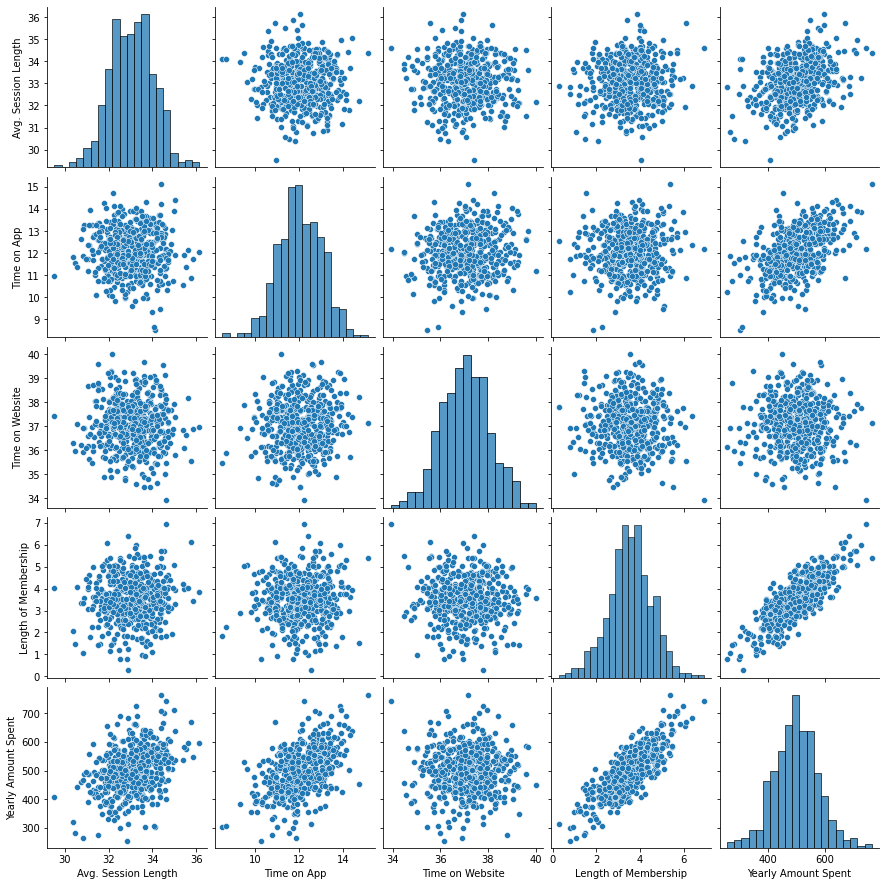

In [42]:
sns.pairplot(yearly_cust_sales)

<AxesSubplot:>

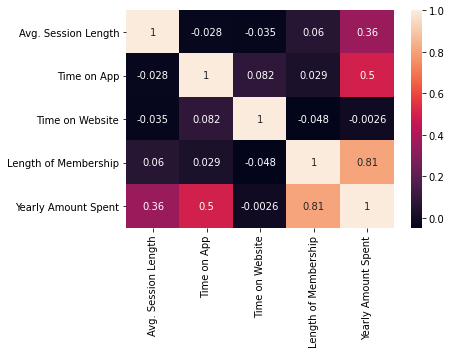

In [47]:
sns.heatmap(yearly_cust_sales.corr(), annot= True)

<AxesSubplot:>

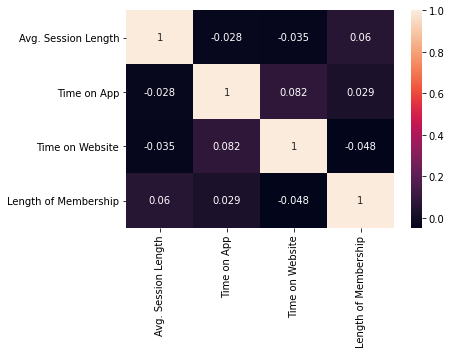

In [48]:
sns.heatmap(yearly_cust_sales[X_columns].corr(), annot= True)